In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Анализ пользователей из базы данных "Музыкальный ассистент"

**Замечание:** данные сгенерированы рандомным образом, поэтому не несут никакой полезной информации. Поэтому никаких выводов не будет.

Если бы мы рассматривали настоящие данные, то с помощью графиков ниже могли бы понять целевую аудиторию: стана проживания, дата рождения. А также в какие промежутки времени наше приложение пользовалось большей полулярностью.

Загрузим данные из базы данных.

In [2]:
connection = psycopg2.connect(user="postgres",
                              password="postgres",
                              host="127.0.0.1",
                              port="5432",
                              database="pg_db")

user = pd.read_sql("SELECT * from pr.user", connection)
view = pd.read_sql("SELECT * from pr.view", connection)

Посмотрим на данные из таблицы user.

In [18]:
user.tail()

,userid,name,country,region,datebirth,starttime
1988,1995,Антонина Тимофеевна Семенова,Молдова,Каларашский район,1997-04-18 22:45:37,2022-12-20 10:50:20
1989,1996,Антонина Кирилловна Лобанова,Беларусь,Минская,1984-07-21 08:50:04,2022-10-22 05:24:54
1990,1997,Панфилов Каллистрат Ермолаевич,Беларусь,Могилёвская,1987-02-18 15:16:14,2022-11-26 19:03:04
1991,1998,Константин Филиппович Шилов,Беларусь,Витебская,1993-09-17 11:03:06,2022-12-19 10:00:13
1992,1999,Симонова Елена Станиславовна,Россия,Свердловская область,1995-11-10 03:12:41,2023-03-26 04:28:12


Проведем анализ по характеристикам

**(а) Категориальные признаки - страна и регион**

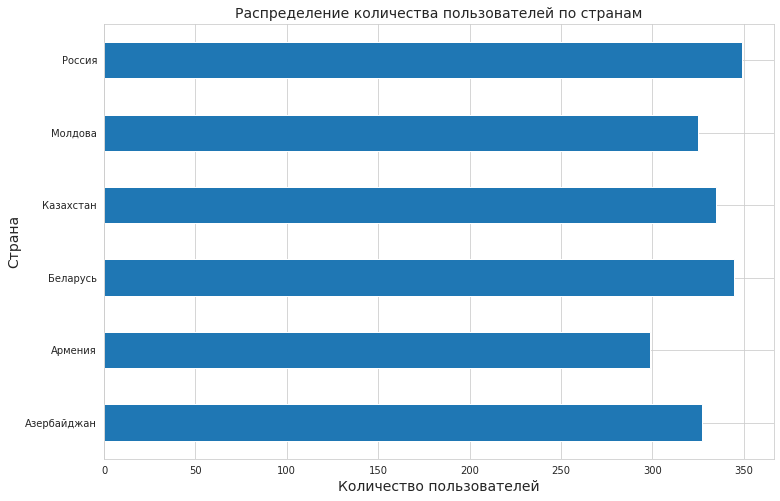

In [16]:
plt.figure(figsize=(12, 8))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    user_country = user.groupby('country')['userid'].count()
    user_country[user_country  > 10].plot.barh();
    plt.xlabel('Количество пользователей', fontsize=14)
    plt.ylabel('Страна', fontsize=14)
    plt.title('Распределение количества пользователей по странам', fontsize=14)

Видим, что больше всего пользователей из России. Посмотрим из каких они регионов.

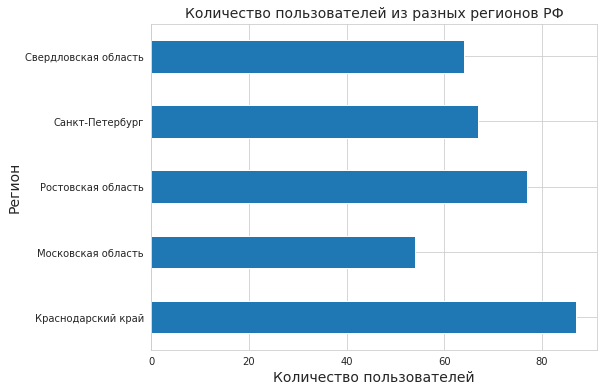

In [8]:
user_from_RF = user[user['country'] == 'Россия']

plt.figure(figsize=(8, 6))
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    user_from_RF.groupby('region')['userid'].count().plot.barh();
    plt.xlabel('Количество пользователей', fontsize=14)
    plt.ylabel('Регион', fontsize=14)
    plt.title('Количество пользователей из разных регионов РФ', fontsize=14)

**(b) Вещественные признаки - дата добавления и день рождения**

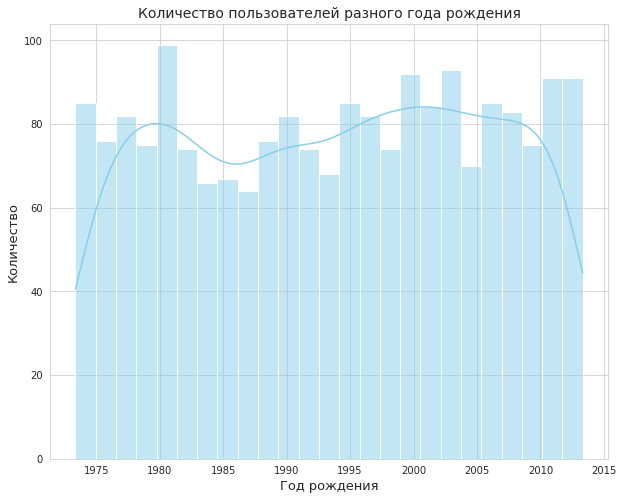

In [24]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 8))
        sns.histplot(x=user["datebirth"], color="skyblue",bins=25, kde=True)
        plt.title('Количество пользователей разного года рождения', fontsize=14)
        plt.xlabel('Год рождения', fontsize=13)
        plt.ylabel('Количество', fontsize=13)

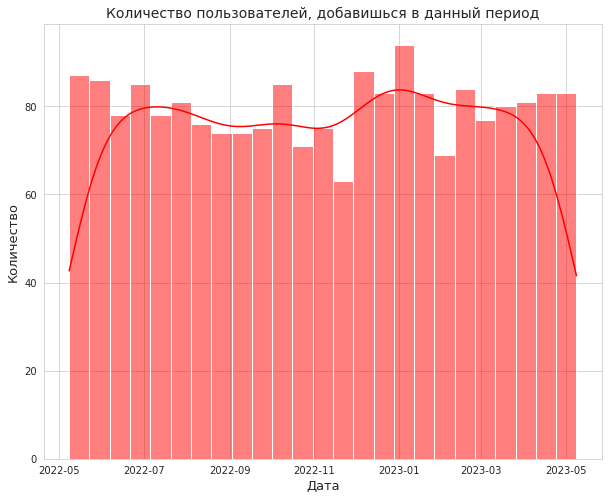

In [27]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 8))
        sns.histplot(x=user["starttime"], color="r",bins=25, kde=True)
        plt.title('Количество пользователей, добавишься в данный период', fontsize=14)
        plt.xlabel('Дата', fontsize=13)
        plt.ylabel('Количество', fontsize=13)